In [ ]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Xavier and He Initialization


In [ ]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [ ]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [ ]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

# Nonsaturating Activation Functions

In [ ]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [ ]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4431872/4422102 [==============================] - 0s 0us/step


### Leaky ReLU

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5339 - accuracy: 0.8223 - val_loss: 0.5156 - val_accuracy

### PReLU

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7628
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6966 - accuracy: 0.7694 - val_loss: 0.6565 - val_accuracy: 0.7878
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6003 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5656 - val_accuracy: 0.8180
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5618 - accuracy: 0.8134 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5390 - accuracy: 0.8205 - val_loss: 0.5196 - val_accuracy:

### ELU

In [ ]:
keras.layers.Dense(10, activation="elu")

### SELU

In [ ]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 33s 17ms/step - loss: 1.3776 - accuracy: 0.4540 - val_loss: 1.1731 - val_accuracy: 0.5614
Epoch 2/5
1719/1719 [==============================] - 28s 16ms/step - loss: 0.9138 - accuracy: 0.6665 - val_loss: 0.7028 - val_accuracy: 0.7484
Epoch 3/5
1719/1719 [==============================] - 28s 16ms/step - loss: 0.6962 - accuracy: 0.7481 - val_loss: 0.6540 - val_accuracy: 0.7546
Epoch 4/5
1719/1719 [==============================] - 26s 15ms/step - loss: 0.6539 - accuracy: 0.7676 - val_loss: 0.5557 - val_accuracy: 0.7978
Epoch 5/5
1719/1719 [==============================] - 29s 17ms/step - loss: 0.5582 - accuracy: 0.7990 - val_loss: 0.5703 - val_accuracy: 0.8016


### RELU

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 28s 15ms/step - loss: 1.8261 - accuracy: 0.2616 - val_loss: 1.3347 - val_accuracy: 0.3894
Epoch 2/5
1719/1719 [==============================] - 25s 15ms/step - loss: 1.1959 - accuracy: 0.4908 - val_loss: 0.9373 - val_accuracy: 0.5902
Epoch 3/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.9600 - accuracy: 0.6118 - val_loss: 0.9026 - val_accuracy: 0.5906
Epoch 4/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.8231 - accuracy: 0.6759 - val_loss: 0.7320 - val_accuracy: 0.7290
Epoch 5/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.7360 - accuracy: 0.7171 - val_loss: 0.7823 - val_accuracy: 0.7108


# Batch Normalization


As with most things with Keras, implementing Batch Normalization is simple and intuitive. Just add a BatchNormalization layer before or after each hidden layer’s activation function, and optionally add a BN layer as well as the first layer in your model.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_212 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_213 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.8750 - accuracy: 0.7123 - val_loss: 0.5525 - val_accuracy: 0.8224
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5754 - accuracy: 0.8030 - val_loss: 0.4725 - val_accuracy: 0.8472
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5189 - accuracy: 0.8205 - val_loss: 0.4376 - val_accuracy: 0.8550
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4827 - accuracy: 0.8324 - val_loss: 0.4153 - val_accuracy: 0.8600
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4565 - accuracy: 0.8407 - val_loss: 0.3997 - val_accuracy: 0.8644
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4397 - accuracy: 0.8475 - val_loss: 0.3867 - val_accuracy: 0.8694
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4241 - accuracy: 0.8515 - val_loss: 0.3762 - val_accuracy

Sometimes applying BN before the activation function works better (there's a debate on this topic). Moreover, the layer before a BatchNormalization layer does not need to have bias terms, since the BatchNormalization layer has some as well, it would be a waste of parameters, so you can set use_bias=False when creating those layers:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.0317 - accuracy: 0.6756 - val_loss: 0.6767 - val_accuracy: 0.7814
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6790 - accuracy: 0.7793 - val_loss: 0.5566 - val_accuracy: 0.8184
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5960 - accuracy: 0.8037 - val_loss: 0.5007 - val_accuracy: 0.8362
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5447 - accuracy: 0.8191 - val_loss: 0.4666 - val_accuracy: 0.8452
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5109 - accuracy: 0.8280 - val_loss: 0.4434 - val_accuracy: 0.8536
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4898 - accuracy: 0.8337 - val_loss: 0.4263 - val_accuracy: 0.8548
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4712 - accuracy: 0.8396 - val_loss: 0.4130 - val_accuracy:

The BatchNormalization class has quite a few hyperparameters you can tweak. The defaults will usually be fine, but you may occasionally need to tweak the ***momentum***. This hyperparameter is used by the BatchNormalization layer when it updates the exponential moving averages.

A good momentum value is typically close to 1; for example, 0.9, 0.99, or 0.999 (you want more 9s for larger datasets and smaller mini-batches).

Another important hyperparameter is ***axis***: it determines which axis should be normalized. It defaults to –1, meaning that by default it will normalize the last axis (using the means and standard deviations computed across the other axes). When the input batch is 2D (i.e., the batch shape is [batch size, features]), this means that each input feature will be normalized based on the mean and standard deviation computed across all the instances in the batch. For example, the first BN layer in the previous code example will independently normalize (and rescale and shift) each of the 784 input features. If we move the first BN layer before the Flatten layer, then the input batches will be 3D, with shape [batch size, height, width]; therefore, the BN layer will compute 28 means and 28 standard deviations (1 per column of pixels, computed across all instances in the batch and across all rows in the column), and it will normalize all pixels in a given column using the same mean and standard deviation. There will also be just 28 scale parameters and 28 shift parameters. If instead you still want to treat each of the 784 pixels independently, then you should set axis=[1, 2].

# Gradient Clipping

In [ ]:
# All Keras optimizers accept clipnorm or clipvalue arguments:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Reusing Pretrained Layers

Reusing a Keras model

Let's split the fashion MNIST training set in two:

* X_train_A: all images of all items except for sandals and shirts (classes 5 and 6).
* X_train_B: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using `Dense` layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

In [ ]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
X_train_A.shape

(43986, 28, 28)

In [ ]:
X_train_B.shape

(200, 28, 28)

In [ ]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [ ]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [ ]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.5927 - accuracy: 0.8104 - val_loss: 0.3896 - val_accuracy: 0.8667
Epoch 2/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3289 - val_accuracy: 0.8824
Epoch 3/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3170 - accuracy: 0.8896 - val_loss: 0.3014 - val_accuracy: 0.8989
Epoch 4/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2973 - accuracy: 0.8975 - val_loss: 0.2894 - val_accuracy: 0.9021
Epoch 5/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2835 - accuracy: 0.9022 - val_loss: 0.2776 - val_accuracy: 0.9066
Epoch 6/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.2729 - accuracy: 0.9061 - val_loss: 0.2735 - val_accuracy: 0.9071
Epoch 7/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2641 - accuracy: 0.9093 - val_loss: 0.2720 - val_accuracy:

In [ ]:
model_A.save("my_model_A.h5")

In [ ]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 44ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 16ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 18ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 17ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [ ]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_224 (Dense)           (None, 300)               235500    
                                                                 
 dense_225 (Dense)           (None, 100)               30100     
                                                                 
 dense_226 (Dense)           (None, 50)                5050      
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 50)                2550      
                                                                 
 dense_229 (Dense)           (None, 1)                

In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

Note that `model_B_on_A` and `model_A` actually share layers now, so when we train one, it will update both models. If we want to avoid that, we need to build `model_B_on_A` on top of a clone of `model_A`:

In [ ]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

# You must always compile your model after you freeze or unfreeze layers.
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

Now you can train the model for a few epochs, then unfreeze the reused layers (which requires compiling the model again) and continue training to fine-tune the reused layers for task B. After unfreezing the reused layers, it is usually a good idea to reduce the learning rate, once again to avoid damaging the reused weights:

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 40ms/step - loss: 0.2632 - accuracy: 0.9400 - val_loss: 0.2779 - val_accuracy: 0.9270
Epoch 2/4
7/7 [==============================] - 0s 15ms/step - loss: 0.2536 - accuracy: 0.9400 - val_loss: 0.2685 - val_accuracy: 0.9300
Epoch 3/4
7/7 [==============================] - 0s 15ms/step - loss: 0.2444 - accuracy: 0.9400 - val_loss: 0.2599 - val_accuracy: 0.9351
Epoch 4/4
7/7 [==============================] - 0s 14ms/step - loss: 0.2360 - accuracy: 0.9400 - val_loss: 0.2518 - val_accuracy: 0.9381
Epoch 1/16
7/7 [==============================] - 1s 42ms/step - loss: 0.2113 - accuracy: 0.9450 - val_loss: 0.2040 - val_accuracy: 0.9635
Epoch 2/16
7/7 [==============================] - 0s 18ms/step - loss: 0.1691 - accuracy: 0.9550 - val_loss: 0.1719 - val_accuracy: 0.9716
Epoch 3/16
7/7 [==============================] - 0s 17ms/step - loss: 0.1404 - accuracy: 0.9700 - val_loss: 0.1492 - val_accuracy: 0.9807
Epoch 4/16
7/7 [===============

Are you convinced? You shouldn’t be: I cheated! I tried many configurations until I found one that demonstrated a strong improvement. If you try to change the classes or the random seed, you will see that the improvement generally drops, or even vanishes or reverses. What I did is called “torturing the data until it confesses.” When a paper just looks too positive, you should be suspicious: perhaps the flashy new technique does not actually help much (in fact, it may even degrade performance), but the authors tried many variants and reported only the best results (which may be due to sheer luck), without mentioning how many failures they encountered on the way. Most of the time, this is not malicious at all, but it is part of the reason so many results in science can never be reproduced.

Why did I cheat? It turns out that transfer learning does not work very well with small dense networks, presumably because small networks learn few patterns, and dense networks learn very specific patterns, which are unlikely to be useful in other tasks. Transfer learning works best with deep convolutional neural networks, which tend to learn feature detectors that are much more general (especially in the lower layers). We will revisit transfer learning in the next Chapter, using the techniques we just discussed (and this time there will be no cheating, I promise!).

# Faster Optimizers


In [ ]:
def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    
def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [ ]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6875 - accuracy: 0.7660 - val_loss: 0.4798 - val_accuracy: 0.8344
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4615 - accuracy: 0.8370 - val_loss: 0.4446 - val_accuracy: 0.8474
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4171 - accuracy: 0.8506 - val_loss: 0.3968 - val_accuracy: 0.8590
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3888 - accuracy: 0.8621 - val_loss: 0.3793 - val_accuracy: 0.8654
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3705 - accuracy: 0.8676 - val_loss: 0.3614 - val_accuracy: 0.8686
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3552 - accuracy: 0.8725 - val_loss: 0.3568 - val_accuracy: 0.8738
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3428 - accuracy: 0.8764 - val_loss: 0.3440 - val_accuracy:

### Momentum optimization


In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
history_momentum = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6875 - accuracy: 0.7660 - val_loss: 0.4798 - val_accuracy: 0.8344
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4615 - accuracy: 0.8370 - val_loss: 0.4446 - val_accuracy: 0.8474
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4171 - accuracy: 0.8506 - val_loss: 0.3968 - val_accuracy: 0.8590
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3888 - accuracy: 0.8621 - val_loss: 0.3793 - val_accuracy: 0.8654
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3705 - accuracy: 0.8676 - val_loss: 0.3614 - val_accuracy: 0.8686
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3552 - accuracy: 0.8725 - val_loss: 0.3568 - val_accuracy: 0.8738
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3428 - accuracy: 0.8764 - val_loss: 0.3440 - val_accuracy:

### Nesterov Accelerated Gradient

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6791 - accuracy: 0.7696 - val_loss: 0.4695 - val_accuracy: 0.8388
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4555 - accuracy: 0.8391 - val_loss: 0.4238 - val_accuracy: 0.8576
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4123 - accuracy: 0.8532 - val_loss: 0.3972 - val_accuracy: 0.8606
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3855 - accuracy: 0.8631 - val_loss: 0.3789 - val_accuracy: 0.8672
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3677 - accuracy: 0.8692 - val_loss: 0.3580 - val_accuracy: 0.8712
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3522 - accuracy: 0.8738 - val_loss: 0.3616 - val_accuracy: 0.8742
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3393 - accuracy: 0.8777 - val_loss: 0.3433 - val_accuracy:

### AdaGrad


In [ ]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 1.0026 - accuracy: 0.6821 - val_loss: 0.6916 - val_accuracy: 0.7722
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6414 - accuracy: 0.7885 - val_loss: 0.5852 - val_accuracy: 0.8056
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5702 - accuracy: 0.8103 - val_loss: 0.5479 - val_accuracy: 0.8166
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5336 - accuracy: 0.8203 - val_loss: 0.5120 - val_accuracy: 0.8274
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5102 - accuracy: 0.8276 - val_loss: 0.4933 - val_accuracy: 0.8332
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4930 - accuracy: 0.8321 - val_loss: 0.4789 - val_accuracy: 0.8370
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4796 - accuracy: 0.8359 - val_loss: 0.4670 - val_accuracy:

### RMSProp

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5103 - accuracy: 0.8151 - val_loss: 0.4310 - val_accuracy: 0.8432
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3970 - accuracy: 0.8567 - val_loss: 0.3630 - val_accuracy: 0.8698
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3722 - accuracy: 0.8677 - val_loss: 0.4707 - val_accuracy: 0.8328
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3642 - accuracy: 0.8714 - val_loss: 0.3778 - val_accuracy: 0.8780
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3612 - accuracy: 0.8742 - val_loss: 0.4318 - val_accuracy: 0.8658
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3567 - accuracy: 0.8768 - val_loss: 0.4467 - val_accuracy: 0.8664
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3580 - accuracy: 0.8773 - val_loss: 0.4423 - val_accuracy

### Adam Optimization


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4965 - accuracy: 0.8220 - val_loss: 0.3884 - val_accuracy: 0.8588
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3747 - accuracy: 0.8631 - val_loss: 0.3927 - val_accuracy: 0.8590
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3417 - accuracy: 0.8737 - val_loss: 0.3290 - val_accuracy: 0.8812
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3160 - accuracy: 0.8827 - val_loss: 0.3171 - val_accuracy: 0.8828
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3001 - accuracy: 0.8873 - val_loss: 0.3121 - val_accuracy: 0.8862
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2846 - accuracy: 0.8943 - val_loss: 0.3302 - val_accuracy: 0.8848
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2738 - accuracy: 0.8982 - val_loss: 0.3064 - val_accuracy:

### Adamax Optimization


In [ ]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5325 - accuracy: 0.8147 - val_loss: 0.4048 - val_accuracy: 0.8602
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3956 - accuracy: 0.8583 - val_loss: 0.3893 - val_accuracy: 0.8592
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3576 - accuracy: 0.8693 - val_loss: 0.3470 - val_accuracy: 0.8782
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3314 - accuracy: 0.8787 - val_loss: 0.3295 - val_accuracy: 0.8792
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3149 - accuracy: 0.8844 - val_loss: 0.3230 - val_accuracy: 0.8806
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3005 - accuracy: 0.8899 - val_loss: 0.3233 - val_accuracy: 0.8838
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2879 - accuracy: 0.8928 - val_loss: 0.3059 - val_accuracy:

### Nadam Optimization


In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
history_nadam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4834 - accuracy: 0.8268 - val_loss: 0.3751 - val_accuracy: 0.8622
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3616 - accuracy: 0.8676 - val_loss: 0.3545 - val_accuracy: 0.8738
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3275 - accuracy: 0.8790 - val_loss: 0.3507 - val_accuracy: 0.8716
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3071 - accuracy: 0.8866 - val_loss: 0.3141 - val_accuracy: 0.8854
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2910 - accuracy: 0.8908 - val_loss: 0.3061 - val_accuracy: 0.8890
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2761 - accuracy: 0.8972 - val_loss: 0.3235 - val_accuracy: 0.8890
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2653 - accuracy: 0.9015 - val_loss: 0.3315 - val_accuracy:

### AdamW Optimization

On Colab or Kaggle, we need to install the TensorFlow-Addons library:

In [ ]:
import sys

if "google.colab" in sys.modules or "kaggle_secrets" in sys.modules:
    %pip install -q -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [ ]:
import tensorflow_addons as tfa

optimizer = tfa.optimizers.AdamW(weight_decay=1e-5, learning_rate=0.001,
                                 beta_1=0.9, beta_2=0.999)
history_adamw = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4977 - accuracy: 0.8199 - val_loss: 0.3738 - val_accuracy: 0.8672
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3740 - accuracy: 0.8621 - val_loss: 0.4021 - val_accuracy: 0.8626
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3415 - accuracy: 0.8729 - val_loss: 0.3321 - val_accuracy: 0.8790
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3187 - accuracy: 0.8817 - val_loss: 0.3173 - val_accuracy: 0.8810
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2996 - accuracy: 0.8879 - val_loss: 0.3101 - val_accuracy: 0.8882
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2866 - accuracy: 0.8953 - val_loss: 0.3235 - val_accuracy: 0.8836
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2767 - accuracy: 0.8975 - val_loss: 0.3051 - val_accuracy:

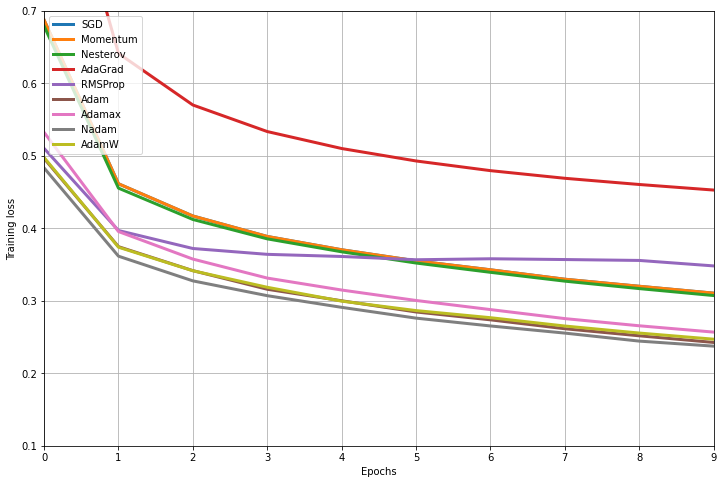

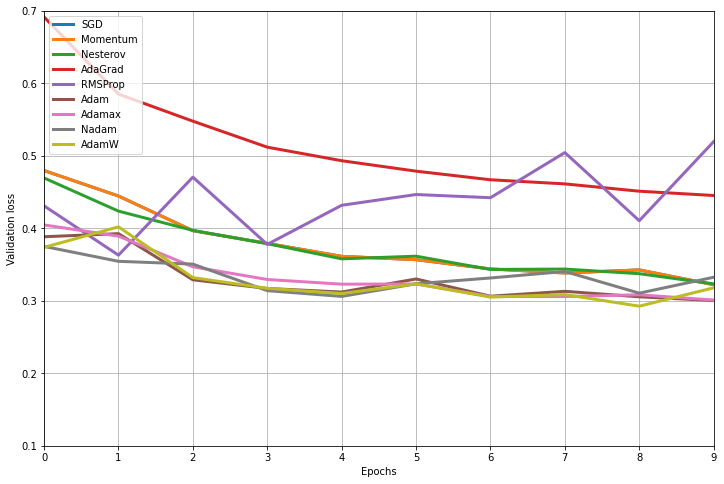

In [ ]:
import matplotlib.pyplot as plt

for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
                                  history_adamax, history_nadam, history_adamw),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])

# Learning Rate Scheduling


Power Scheduling


lr = lr0 / (1 + steps / s)**c

Keras uses **c=1** and **s = 1 / decay**




In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)
# The decay is the inverse of s (the number of steps it takes to divide the 
# learning rate by one more unit), and Keras assumes that c is equal to 1.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4910 - accuracy: 0.8277 - val_loss: 0.4047 - val_accuracy: 0.8618
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3833 - accuracy: 0.8651 - val_loss: 0.3746 - val_accuracy: 0.8706
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3504 - accuracy: 0.8753 - val_loss: 0.3751 - val_accuracy: 0.8712
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3292 - accuracy: 0.8826 - val_loss: 0.3526 - val_accuracy: 0.8760
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3139 - accuracy: 0.8889 - val_loss: 0.3462 - val_accuracy: 0.8780
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3003 - accuracy: 0.8929 - val_loss: 0.3441 - val_accuracy: 0.8816
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2902 - accuracy: 0.8968 - val_loss: 0.3390 - val_accuracy:

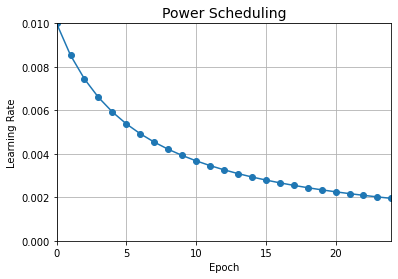

In [ ]:
import math
import matplotlib.pyplot as plt

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)

# Exponential Scheduling
lr = lr0 * 0.1**(epoch / s)

In [ ]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

In [ ]:
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.8976 - accuracy: 0.7456 - val_loss: 1.1408 - val_accuracy: 0.6986 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7723 - accuracy: 0.7692 - val_loss: 1.1724 - val_accuracy: 0.5692 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8696 - accuracy: 0.6823 - val_loss: 0.8564 - val_accuracy: 0.7186 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7017 - accuracy: 0.7583 - val_loss: 0.6567 - val_accuracy: 0.7882 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5347 - accuracy: 0.8345 - val_loss: 0.5084 - val_accuracy: 0.8552 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4812 - accuracy: 0.8518 - val_loss: 0.5338 - val_accuracy: 0.8566 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================

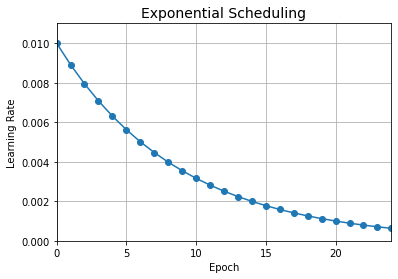

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)

The schedule function can optionally take the current learning rate as a second argument. For example, the following schedule function multiplies the previous learning rate by 0.11/20, which results in the same exponential decay (except the decay now starts at the beginning of epoch 0 instead of 1):

In [ ]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

If you want to update the learning rate at each iteration rather than at each epoch, you must write your own callback class:



In [ ]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / self.s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.8235 - accuracy: 0.7610 - val_loss: 1.1460 - val_accuracy: 0.7128 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 15s 8ms/step - loss: 0.6320 - accuracy: 0.8025 - val_loss: 0.5327 - val_accuracy: 0.8284 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5534 - accuracy: 0.8267 - val_loss: 0.6620 - val_accuracy: 0.8156 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5379 - accuracy: 0.8354 - val_loss: 0.5174 - val_accuracy: 0.8464 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4707 - accuracy: 0.8529 - val_loss: 0.4724 - val_accuracy: 0.8662 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4190 - accuracy: 0.8666 - val_loss: 0.4960 - val_accuracy: 0.8580 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================

In [ ]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

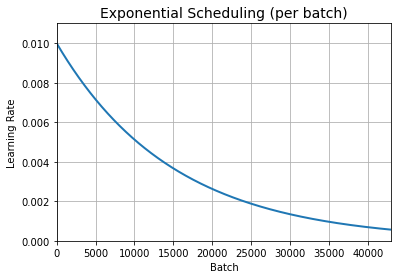

In [ ]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)

When you save a model, the optimizer and its learning rate get saved along with it. This means that with this new schedule function, you could just load a trained model and continue training where it left off, no problem. Things are not so simple if your schedule function uses the epoch argument, however: the epoch does not get saved, and it gets reset to 0 every time you call the fit() method. If you were to continue training a model where it left off, this could lead to a very large learning rate, which would likely damage your model’s weights. One solution is to manually set the fit() method’s initial_epoch argument so the epoch starts at the right value.

# Piecewise Constant Scheduling

In [ ]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [ ]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])


Epoch 1/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8977 - accuracy: 0.7462 - val_loss: 0.8990 - val_accuracy: 0.7664 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8797 - accuracy: 0.7449 - val_loss: 0.8761 - val_accuracy: 0.7686 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8428 - accuracy: 0.7389 - val_loss: 1.1898 - val_accuracy: 0.6818 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8061 - accuracy: 0.7485 - val_loss: 0.7487 - val_accuracy: 0.7450 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 11s 7ms/step - loss: 0.9504 - accuracy: 0.7184 - val_loss: 1.1320 - val_accuracy: 0.6658 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6535 - accuracy: 0.7646 - val_loss: 0.7056 - val_accuracy: 0.7594 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================

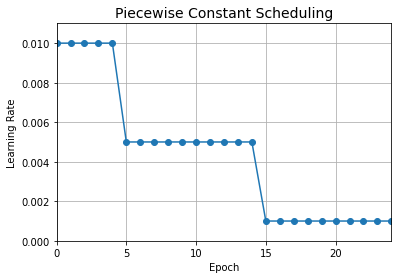

In [ ]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)

# Performance Scheduling


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5908 - accuracy: 0.8070 - val_loss: 0.4863 - val_accuracy: 0.8474 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4939 - accuracy: 0.8393 - val_loss: 0.6034 - val_accuracy: 0.8374 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5016 - accuracy: 0.8439 - val_loss: 0.4986 - val_accuracy: 0.8544 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5030 - accuracy: 0.8486 - val_loss: 0.5206 - val_accuracy: 0.8588 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5136 - accuracy: 0.8504 - val_loss: 0.4708 - val_accuracy: 0.8560 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5028 - accuracy: 0.8559 - val_loss: 0.5840 - val_accuracy: 0.8518 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 6s

Text(0.5, 1.0, 'Reduce LR on Plateau')

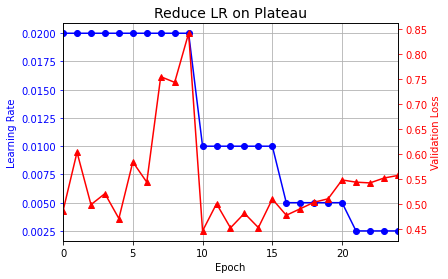

In [ ]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)

# tf.keras schedulers


Lastly, tf.keras offers an alternative way to implement learning rate scheduling: define the learning rate using one of the schedules available in keras.optimizers.schedules, then pass this learning rate to any optimizer. This approach updates the learning rate at each step rather than at each epoch. For example, here is how to implement the same exponential schedule as the exponential_decay_fn() function we defined earlier:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4894 - accuracy: 0.8273 - val_loss: 0.4096 - val_accuracy: 0.8604
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3820 - accuracy: 0.8651 - val_loss: 0.3740 - val_accuracy: 0.8708
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3486 - accuracy: 0.8763 - val_loss: 0.3730 - val_accuracy: 0.8684
Epoch 4/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3264 - accuracy: 0.8838 - val_loss: 0.3492 - val_accuracy: 0.8802
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3103 - accuracy: 0.8896 - val_loss: 0.3428 - val_accuracy: 0.8794
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2957 - accuracy: 0.8952 - val_loss: 0.3410 - val_accuracy: 0.8822
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2853 - accuracy: 0.8988 - val_loss: 0.3352 - val_accuracy:

For piecewise constant scheduling, try this:



In [ ]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

This is nice and simple, plus when you save the model, the learning rate and its schedule (including its state) get saved as well. This approach, however, is not part of the Keras API; it is specific to tf.keras.

# 1Cycle scheduling


The OneCycleScheduler custom callback updates the learning rate at the beginning of each batch. It applies the logic described in the book: increase the learning rate linearly during about half of training, then reduce it linearly back to the initial learning rate, and lastly reduce it down to close to zero linearly for the very last part of training.

In [ ]:
K = keras.backend

class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5203 - accuracy: 0.8173 - val_loss: 0.4173 - val_accuracy: 0.8582
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3974 - accuracy: 0.8591 - val_loss: 0.3777 - val_accuracy: 0.8684
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3617 - accuracy: 0.8716 - val_loss: 0.4067 - val_accuracy: 0.8554
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3385 - accuracy: 0.8769 - val_loss: 0.3497 - val_accuracy: 0.8766
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3197 - accuracy: 0.8848 - val_loss: 0.3463 - val_accuracy: 0.8740
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2983 - accuracy: 0.8915 - val_loss: 0.3491 - val_accuracy: 0.8780
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2860 - accuracy: 0.8950 - val_loss: 0.3915 - val_accuracy:

# Avoiding Overfitting Through Regularization

# ℓ1 and ℓ2 Regularization


In [ ]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor of 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 14s 8ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376


In [ ]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 14s 8ms/step - loss: 1.6313 - accuracy: 0.8113 - val_loss: 0.7218 - val_accuracy: 0.8310
Epoch 2/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7187 - accuracy: 0.8273 - val_loss: 0.6826 - val_accuracy: 0.8382


# Dropout

If you observe that the model is overfitting, you can increase the dropout rate. Conversely, you should try decreasing the dropout rate if the model underfits the training set. It can also help to increase the dropout rate for large layers, and reduce it for small ones. Moreover, many state-of-the-art architectures only use dropout after the last hidden layer, so you may want to try this if full dropout is too strong.

Dropout does tend to significantly slow down convergence, but it usually results in a much better model when tuned properly. So, it is generally well worth the extra time and effort.

To implement dropout using Keras, you can use the keras.layers.Dropout layer. During training, it randomly drops some inputs (setting them to 0) and divides the remaining inputs by the keep probability. After training, it does nothing at all; it just passes the inputs to the next layer.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5838 - accuracy: 0.7997 - val_loss: 0.3730 - val_accuracy: 0.8644
Epoch 2/2
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4209 - accuracy: 0.8443 - val_loss: 0.3396 - val_accuracy: 0.8714


# Alpha Dropout


If you want to regularize a self-normalizing network based on the SELU activation function (as discussed earlier), you should use alpha dropout: this is a variant of dropout that preserves the mean and standard deviation of its inputs (it was introduced in the same paper as SELU, as regular dropout would break self-normalization).

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6617 - accuracy: 0.7611 - val_loss: 0.5777 - val_accuracy: 0.8410
Epoch 2/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5548 - accuracy: 0.7966 - val_loss: 0.5416 - val_accuracy: 0.8480
Epoch 3/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5258 - accuracy: 0.8063 - val_loss: 0.5018 - val_accuracy: 0.8570
Epoch 4/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5049 - accuracy: 0.8131 - val_loss: 0.4768 - val_accuracy: 0.8600
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4926 - accuracy: 0.8179 - val_loss: 0.4620 - val_accuracy: 0.8610
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4839 - accuracy: 0.8203 - val_loss: 0.4777 - val_accuracy: 0.8600
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4713 - accuracy: 0.8248 - val_loss: 0.5012 - val_accuracy:

Since dropout is only active during training, comparing the training loss and the validation loss can be misleading. In particular, a model may be overfitting the training set and yet have similar training and validation losses. So make sure to evaluate the training loss without dropout (e.g., after training).

In [ ]:
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8732


[0.41662171483039856, 0.873199999332428]

In [ ]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.3418 - accuracy: 0.8819


[0.3418077826499939, 0.8819272518157959]

# MC Dropout


If this all sounds like a “one weird trick” advertisement, then take a look at the following code. It is the full implementation of MC Dropout, boosting the dropout model we trained earlier without retraining it:

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

We just make 100 predictions over the test set, setting training=True to ensure that the Dropout layer is active, and stack the predictions. Since dropout is active, all the predictions will be different.

Recall that predict() returns a matrix with one row per instance and one column per class. Because there are 10,000 instances in the test set and 10 classes, this is a matrix of shape [10000, 10]. We stack 100 such matrices, so y_probas is an array of shape [100, 10000, 10]. Once we average over the first dimension (axis=0), we get y_proba, an array of shape [10000, 10], like we would get with a single prediction. That’s all! Averaging over multiple predictions with dropout on gives us a Monte Carlo estimate that is generally more reliable than the result of a single prediction with dropout off.

For example, let’s look at the model’s prediction for the first instance in the test set, with dropout off:

In [ ]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.33, 0.  , 0.67]],
      dtype=float32)

The model seems almost certain that this image belongs to class 9 (ankle boot). Should you trust it? Is there really so little room for doubt? Compare this with the predictions made when dropout is activated:

In [ ]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.47, 0.  , 0.47]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.76, 0.  , 0.23]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.52, 0.  , 0.48]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.58, 0.  , 0.39]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.41, 0.  , 0.51]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.57, 0.  , 0.18]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.74, 0.  , 0.19, 0.  , 0.06]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.79]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.55, 0.  , 0.44]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.07, 0.  , 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.47, 0.  , 0.33]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.49, 0.  , 0

This tells a very different story: apparently, when we activate dropout, the model is not sure anymore. It still seems to prefer class 9, but sometimes it hesitates with classes 5 (sandal) and 7 (sneaker), which makes sense given they’re all footwear. Once we average over the first dimension, we get the following MC Dropout predictions:

In [ ]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.45, 0.  , 0.49]],
      dtype=float32)

In [ ]:
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.29, 0.  , 0.3 ]],
      dtype=float32)

Apparently there’s quite a lot of variance in the probability estimates: if you were building a risk-sensitive system (e.g., a medical or financial system), you should probably treat such an uncertain prediction with extreme caution.

In [ ]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8618

The number of Monte Carlo samples you use (100 in this example) is a hyperparameter you can tweak. The higher it is, the more accurate the predictions and their uncertainty estimates will be. However, if you double it, inference time will also be doubled. Moreover, above a certain number of samples, you will notice little improvement. So your job is to find the right trade-off between latency and accuracy, depending on your application.

If your model contains other layers that behave in a special way during training (such as BatchNormalization layers), then you should not force training mode like we just did. Instead, you should replace the Dropout layers with the following MCDropout class:

In [ ]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

Here, we just subclass the Dropout layer and override the call() method to force its training argument to True. Similarly, you could define an MCAlphaDropout class by subclassing AlphaDropout instead. If you are creating a model from scratch, it’s just a matter of using MCDropout rather than Dropout. But if you have a model that was already trained using Dropout, you need to create a new model that’s identical to the existing model except that it replaces the Dropout layers with MCDropout, then copy the existing model’s weights to your new model.
In short, MC Dropout is a fantastic technique that boosts dropout models and provides better uncertainty estimates. And of course, since it is just regular dropout during training, it also acts like a regularizer.

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [ ]:
mc_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaDr  (None, 784)              0         
 opout)                                                          
                                                                 
 dense_299 (Dense)           (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_300 (Dense)           (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlpha  (None, 100)            

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
mc_model.set_weights(model.get_weights())

Now we can use the model with MC Dropout:

In [ ]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.47, 0.  , 0.49]],
      dtype=float32)

# Max norm


In [ ]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [ ]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4741 - accuracy: 0.8337 - val_loss: 0.3711 - val_accuracy: 0.8638
Epoch 2/2
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3566 - accuracy: 0.8711 - val_loss: 0.3563 - val_accuracy: 0.8740
